In [1]:
import time
import RSA_ as RSA
import attack as atta
import matplotlib.pyplot as plt

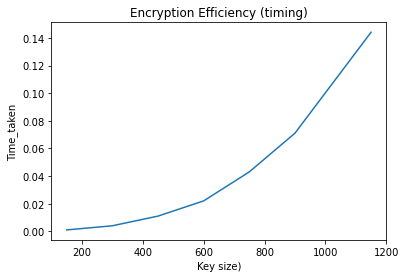

In [2]:
plaintext='nada osman abdalzizzzzzzzzzz'
key_sizes=[150,300,450,600,750,900,1150]
e_list=[]
n_list=[]
d_list=[]
time_list=[]
for i in key_sizes:
    (e,n),(d,n)=RSA.generate_keys(i)
    e_list.append(e)
    n_list.append(n)
    d_list.append(d)

encrypted_messages=[]
for e,n in zip(e_list,n_list):
    remainder = len(plaintext) % 5 
    if remainder != 0:
       plaintext = plaintext + " " * (5 - remainder)  # extend with spaces if necessary
    groups = [plaintext[i:i+5] for i in range(0, len(plaintext), 5)]
    encrypted_message=[]
    start_time = time.time()
    for group in groups:
        enc_group=RSA.Encrypt(group,(n,e))
        encrypted_message.append(enc_group)
    end_time = time.time()
    time_taken = end_time - start_time
    time_list.append(time_taken)
    encrypted_messages.append(encrypted_message)
plt.plot(key_sizes, time_list)
plt.xlabel("Key size")
plt.ylabel("Time_taken")
plt.title("Encryption Efficiency (timing)")
plt.show()



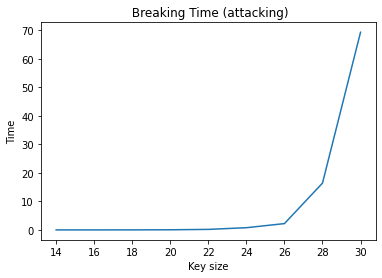

In [4]:
plaintext='yarbbbbbbbbbbbbbb'
key_sizes=[14,16,18,20,22,24,26,28,30]
e_list=[]
n_list=[]
d_list=[]
time_list=[]

for i in key_sizes:
    (n,e),(n,d)=RSA.generate_keys(i)
    e_list.append(e)
    n_list.append(n)
    d_list.append(d)

enc_messages=[]
for e,n in zip(e_list,n_list):
    remainder = len(plaintext) % 5 
    if remainder != 0:
       plaintext = plaintext + " " * (5 - remainder)  # extend with spaces if necessary
    groups = [plaintext[i:i+5] for i in range(0, len(plaintext), 5)]
    encrypted_message=[]
    for group in groups:
        enc_group=RSA.Encrypt(plaintext,(n,e))
        encrypted_message.append(enc_group)
    enc_messages.append(encrypted_message)
    
dec_messages=[]
for n,e,ciphers in zip(n_list,e_list,enc_messages):
    start_time = time.time()
    decrypted_message=atta.attack_for_plot(ciphers,(n,e),plaintext)
    end_time = time.time()
    time_taken = end_time - start_time
    time_list.append(time_taken)
    dec_messages.append(decrypted_message)
plt.plot(key_sizes, time_list)
plt.xlabel("Key size")
plt.ylabel("Time")
plt.title(" Breaking Time (attacking)")
plt.show()
